In [7]:
# 이미지 데이터 컨트롤 패키지
# 간단한 시스템 작업을 위한 패키지

from scipy.misc import imread
from scipy.misc import imresize
import pandas as pd
import os
import pylab
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling

# 폰트 파일 위치
train_dir = '/Users/booknfoto/Desktop/traindata/'
test_dir = '/Users/booknfoto/Desktop/imagefile/'

# 해당 폴더의 모든 파일명 읽어오기
train_file_list = os.listdir(train_dir)
test_file_list = os.listdir(test_dir)

print("train image file directory : ")
print(train_file_list)
print(np.shape(train_file_list))
print("\n")
print("test image file directory : ")
print(test_file_list)
print(np.shape(test_file_list))

train image file directory : 
['1-8.png', '1-9.png', '3-9.png', '4-10.png', '3-8.png', '5-9.png', '5-8.png', '2-9.png', '2-8.png', '2-10.png', '4-9.png', '4-8.png', '4-6.png', '2-1.png', '4-7.png', '5-10.png', '4-5.png', '2-3.png', '2-2.png', '4-4.png', '2-6.png', '2-7.png', '4-1.png', '4-3.png', '2-5.png', '2-4.png', '4-2.png', '1-1.png', '3-3.png', '5-5.png', '5-4.png', '3-2.png', '1-2.png', '3-10.png', '5-6.png', '5-7.png', '3-1.png', '1-3.png', '1-7.png', '3-5.png', '1-10.png', '5-3.png', '5-2.png', '3-4.png', '1-6.png', '1-4.png', '3-6.png', '5-1.png', '3-7.png', '1-5.png']
(50,)


test image file directory : 
['1-8.png', '1-9.png', '3-9.png', '4-10.png', '3-8.png', '5-9.png', '5-8.png', '2-9.png', '2-8.png', '2-10.png', '4-9.png', '4-8.png', '4-6.png', '2-1.png', '4-7.png', '5-10.png', '4-5.png', '2-3.png', '2-2.png', '4-4.png', '2-6.png', '2-7.png', '4-1.png', '4-3.png', '2-5.png', '2-4.png', '4-2.png', '1-1.png', '3-3.png', '5-5.png', '5-4.png', '3-2.png', '1-2.png', '3-10.png'

In [8]:
# 이미지 가로, 세로 지정
img_width = 128
img_height = 128

train_arr = []
train_label_df = pd.DataFrame()
# loop를 통한 train image 전체 읽어오기

for idx, name in enumerate(train_file_list):
    # 파일명에서 label 추출
    train_label_df.loc[idx, "file_name"] = name
    train_label_df.loc[idx, "label"] = name[2]
    # 이미지 읽어오기
    trainimg = imread(train_dir + name)
    # 이미지의 크기 조정
    trainimg = imresize(trainimg, [img_width, img_height])
    # 타입 변환
    trainimg = trainimg.astype("float32")
    # 배열로 적재
    train_arr.append(trainimg)
train_arr = np.stack(train_arr)

print(train_arr[0])
print(train_arr.shape)


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
(50, 128, 128, 4)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  app.launch_new_instance()


In [9]:
# 이미지 가로, 세로 지정
img_width = 128
img_height = 128

train_arr = []
train_label_df = pd.DataFrame()
# loop를 통한 train image 전체 읽어오기
for idx, name in enumerate(train_file_list):
    # 파일명에서 label 추출
    train_label_df.loc[idx, "file_name"] = name
    train_label_df.loc[idx, "label"] = name[2]
    # 이미지 읽어오기
    trainimg = imread(train_dir + name)
    # 이미지의 크기 조정
    trainimg = imresize(trainimg, [img_width, img_height])
    # 타입 변환
    trainimg = trainimg.astype("float32")
    # 배열로 적재
    train_arr.append(trainimg)
train_arr = np.stack(train_arr)

#print(train_label_df.head(15))

test_arr = []
test_label_df = pd.DataFrame()
for idx, name in enumerate(test_file_list):
    test_label_df.loc[idx, 'file_name'] = name
    test_label_df.loc[idx, 'label'] = name[2:3]
    testimg = imread(test_dir + name)
    testimg = imresize(testimg, [img_width, img_height])
    testimg = testimg.astype('float32')
    test_arr.append(testimg)
test_arr = np.stack(test_arr)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [10]:
# 이미지의 최대값 = 255
# 각 셀의 값을 0~1사이 값으로 치환
train_arr /= 255
test_arr /= 255

print(train_arr[0])


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [11]:
# dataframe이었던 label데이터를 array로 변환
train_label = train_label_df["label"].values
# 변수 타입 변경
train_label = train_label.astype("float32")
test_label = test_label_df["label"].values
test_label = test_label.astype("float32")
print("before encoding : ", train_label[0])

# 분류할 폰트 레벨 수
category_cnt = len(np.unique(train_label)) + 1

# One-Hot Encoding
train_label = np_utils.to_categorical(train_label, category_cnt)
test_label = np_utils.to_categorical(test_label, category_cnt)

print("after encoding : ", train_label[0])

train_arr.shape[3]

before encoding :  8.0
after encoding :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


4

In [12]:
# first Convolution layer
model = Sequential()
model.add(Conv2D(16, 3, 3, activation="relu", input_shape=(train_arr.shape[1], train_arr.shape[2], train_arr.shape[3])))
# second Convolution layer

model.add(Conv2D(64, 3, 3, activation="relu"))
model.add(pooling.MaxPooling2D(pool_size=(3, 3)))
# Fully-connected networ0k
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(category_cnt, activation="softmax"))
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      592       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 64)      9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 107584)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               27541760  
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 27,554,202
Trainable params: 27,554,202
Non-trainable params: 0
________________________________________________________________

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(128, 128,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [13]:
# 모델 학습
model.fit(train_arr, train_label, batch_size=32, nb_epoch=10, verbose=1)

# test set 분류
pred_class = model.predict_classes(test_arr)
# 모델 성능
score = model.evaluate(test_arr, test_label, batch_size=4, verbose=0)

print(model.metrics_names)
print(score)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
50/50 [==============================] - 3s 52ms/step - loss: 2.2185 - acc: 0.1600
Epoch 2/10
50/50 [==============================] - 1s 29ms/step - loss: 1.0746 - acc: 0.7600
Epoch 3/10
50/50 [==============================] - 1s 30ms/step - loss: 0.4111 - acc: 0.9200
Epoch 4/10
50/50 [==============================] - 2s 30ms/step - loss: 0.1699 - acc: 0.9800
Epoch 5/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0999 - acc: 0.9600
Epoch 6/10
50/50 [==============================] - 2s 31ms/step - loss: 0.0670 - acc: 0.9600
Epoch 7/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0570 - acc: 0.9600
Epoch 8/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0445 - acc: 0.9800
Epoch 9/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0175 - acc: 1.0000
Epoch 10/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0328 - acc: 1.0000
['loss', 'acc']
[0.00943910231369955, 1.0]



test label is:  1-8
prediction is:  8


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


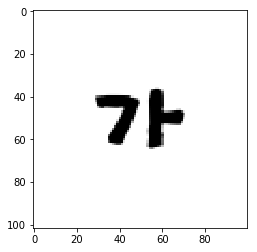


test label is:  1-9
prediction is:  9


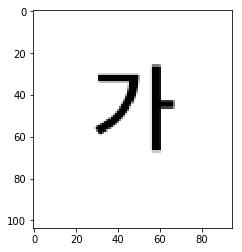


test label is:  3-9
prediction is:  9


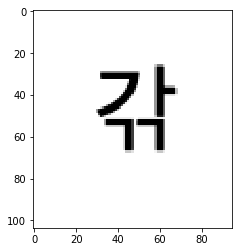


test label is:  4-10
prediction is:  1


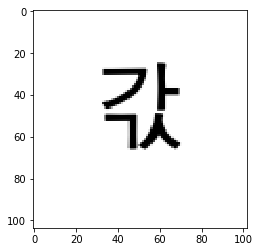


test label is:  3-8
prediction is:  8


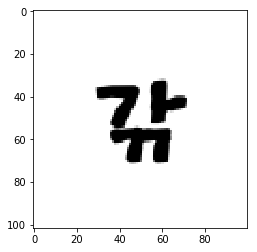


test label is:  5-9
prediction is:  9


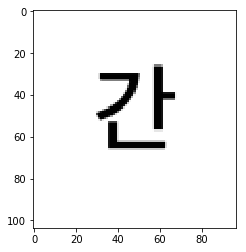


test label is:  5-8
prediction is:  8


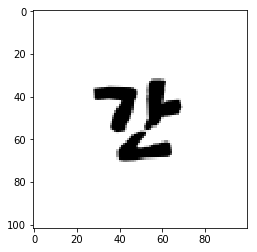


test label is:  2-9
prediction is:  9


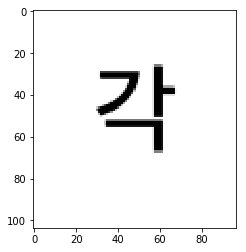


test label is:  2-8
prediction is:  8


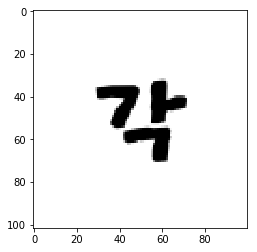


test label is:  2-10
prediction is:  1


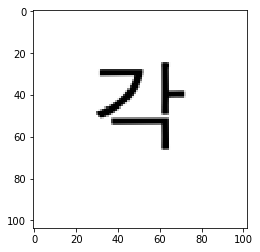


test label is:  4-9
prediction is:  9


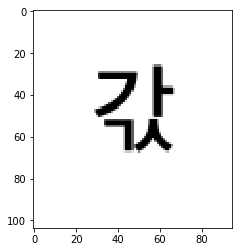


test label is:  4-8
prediction is:  8


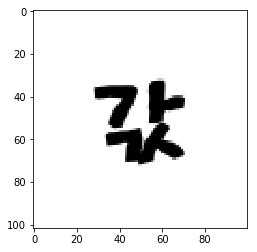


test label is:  4-6
prediction is:  6


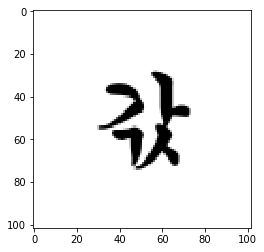


test label is:  2-1
prediction is:  1


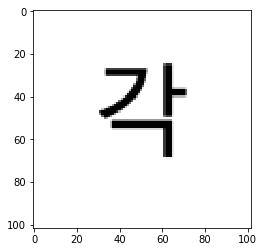


test label is:  4-7
prediction is:  7


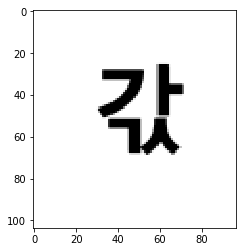


test label is:  5-10
prediction is:  1


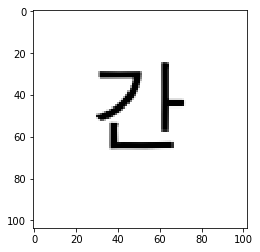


test label is:  4-5
prediction is:  5


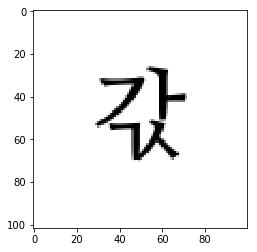


test label is:  2-3
prediction is:  3


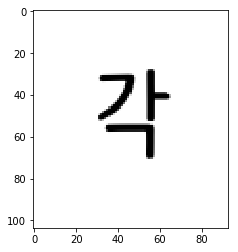


test label is:  2-2
prediction is:  2


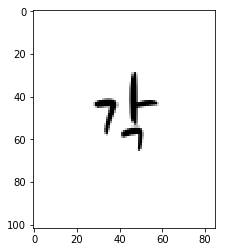


test label is:  4-4
prediction is:  4


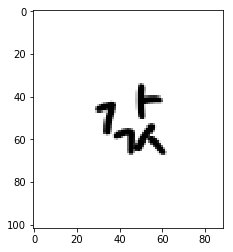


test label is:  2-6
prediction is:  6


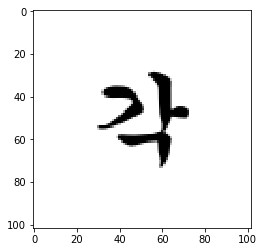


test label is:  2-7
prediction is:  7


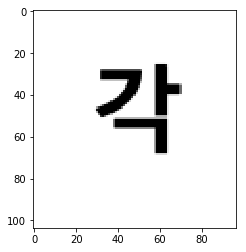


test label is:  4-1
prediction is:  1


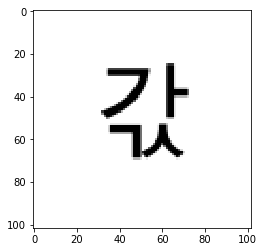


test label is:  4-3
prediction is:  3


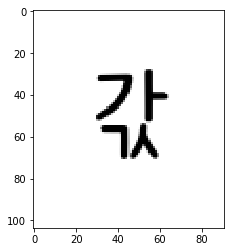


test label is:  2-5
prediction is:  5


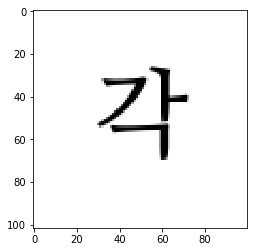


test label is:  2-4
prediction is:  4


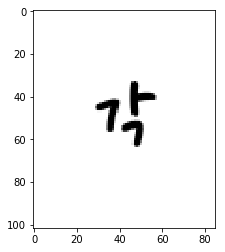


test label is:  4-2
prediction is:  2


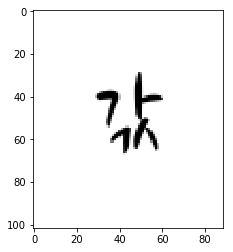


test label is:  1-1
prediction is:  1


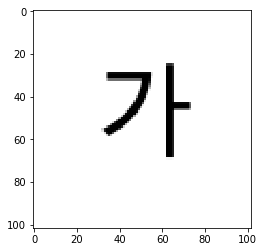


test label is:  3-3
prediction is:  3


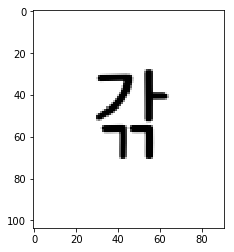


test label is:  5-5
prediction is:  5


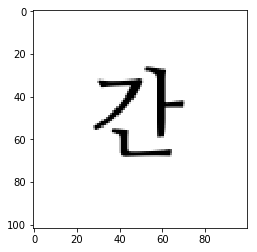


test label is:  5-4
prediction is:  4


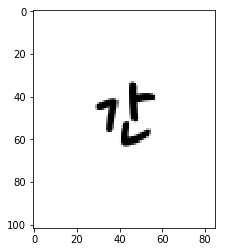


test label is:  3-2
prediction is:  2


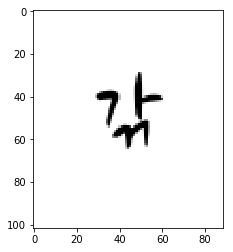


test label is:  1-2
prediction is:  2


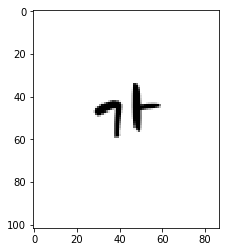


test label is:  3-10
prediction is:  1


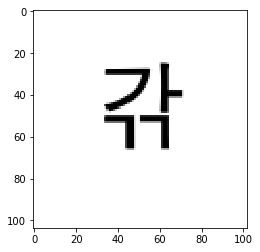


test label is:  5-6
prediction is:  6


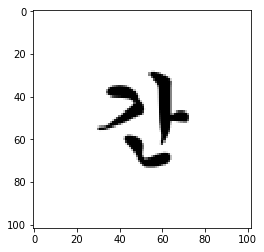


test label is:  5-7
prediction is:  7


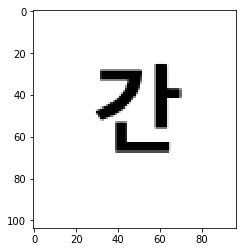


test label is:  3-1
prediction is:  1


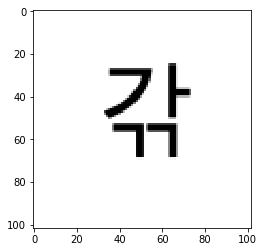


test label is:  1-3
prediction is:  3


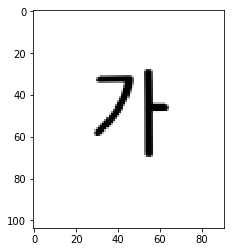


test label is:  1-7
prediction is:  7


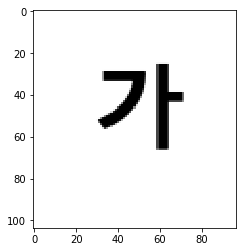


test label is:  3-5
prediction is:  5


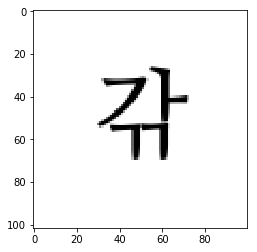


test label is:  1-10
prediction is:  1


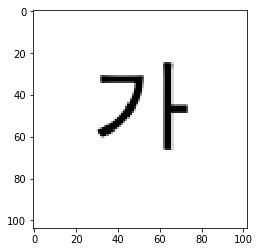


test label is:  5-3
prediction is:  3


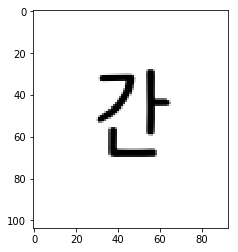


test label is:  5-2
prediction is:  2


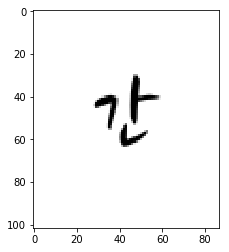


test label is:  3-4
prediction is:  4


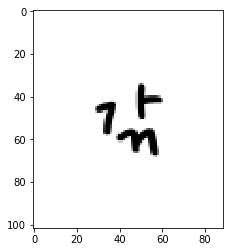


test label is:  1-6
prediction is:  6


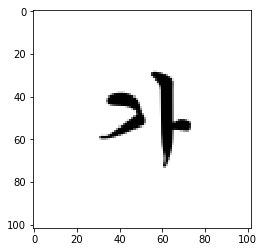


test label is:  1-4
prediction is:  4


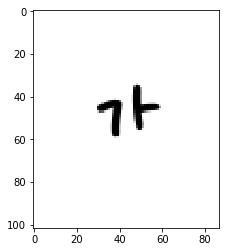


test label is:  3-6
prediction is:  6


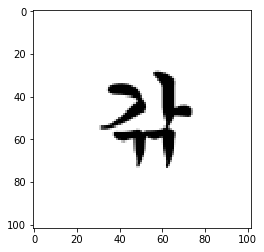


test label is:  5-1
prediction is:  1


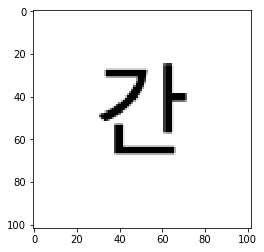


test label is:  3-7
prediction is:  7


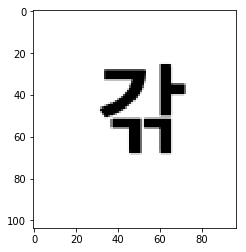


test label is:  1-5
prediction is:  5


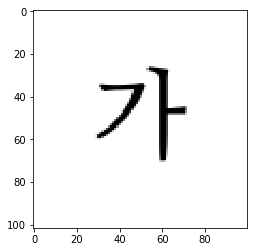

In [14]:
for i, j in enumerate(test_file_list):
    img_name = j
    # test 이미지 읽어오기
    filepath = os.path.join(test_dir + img_name)
    img = imread(filepath)
    test_index = i
    print("\ntest label is: ", img_name[:-4])
    print("prediction is: ", pred_class[test_index])
    # test 이미지와 함께 결과 출력
    pylab.imshow(img)
    pylab.show()
    